In [1]:
import pandas as pd
import numpy as np
import csv
import seaborn as sns
import math
from matplotlib import pyplot as plt
import scipy.stats
import stats
from scipy.stats import ttest_ind

In [2]:
cd D:\IYKRA\File\4. Statistics

D:\IYKRA\File\4. Statistics


In [3]:
df = pd.read_csv('insurance.csv')

In [6]:
df.shape

(1338, 7)

In [3]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


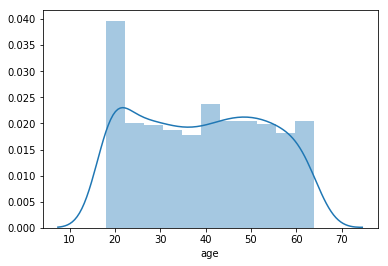

In [15]:
sns.distplot(df['age'])

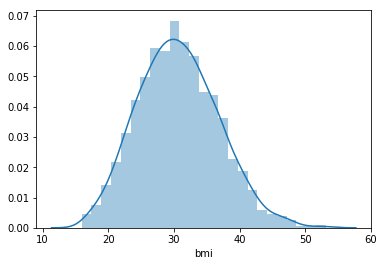

In [14]:
sns.distplot(df['bmi'])

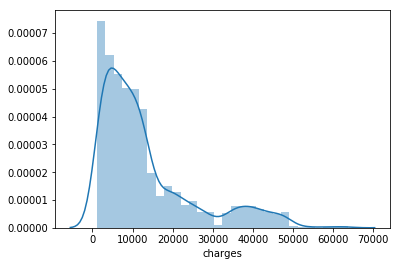

In [18]:
sns.distplot(df['charges'])

In [19]:
df['age'].skew()

0.05567251565299186

In [20]:
df['bmi'].skew()

0.2840471105987448

In [21]:
df['charges'].skew()

1.5158796580240388

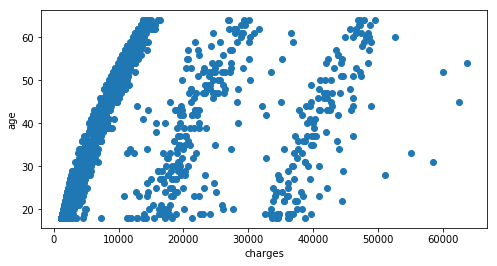

In [15]:
fig, ax = plt.subplots(figsize=(8,4))
ax.scatter(df['charges'],df['age'])
ax.set(xlabel='charges', ylabel='age')
plt.show()

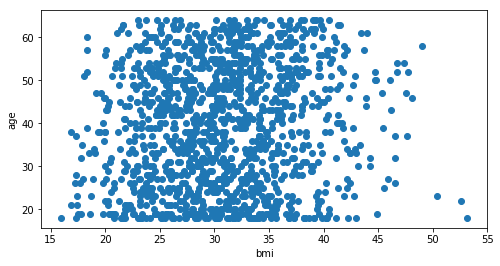

In [16]:
fig, ax = plt.subplots(figsize=(8,4))
ax.scatter(df['bmi'],df['age'])
ax.set(xlabel='bmi', ylabel='age')
plt.show()

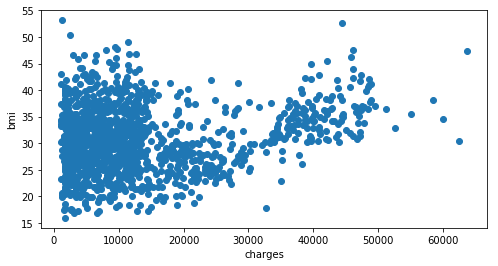

In [17]:
fig, ax = plt.subplots(figsize=(8,4))
ax.scatter(df['charges'],df['bmi'])
ax.set(xlabel='charges', ylabel='bmi')
plt.show()

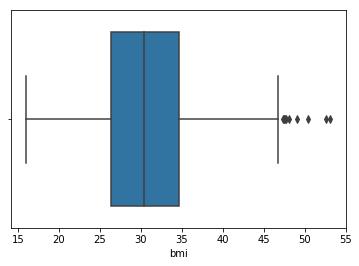

In [23]:
sns.boxplot(x=df['bmi'])

In [5]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [6]:
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

age           0
bmi           9
charges     139
children      0
region        0
sex           0
smoker        0
dtype: int64

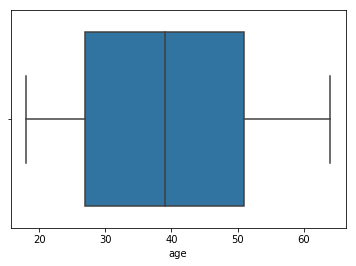

In [32]:
sns.boxplot(x=df['age'])

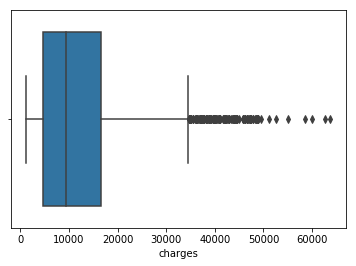

In [33]:
sns.boxplot(x=df['charges'])

In [100]:
sm=df[df['smoker']=='yes']
smk=sm['charges']
smokers=smk
smokers.count()

274

In [102]:
nons=df[df['smoker']=='no']
nonsc=nons['charges']
non=nonsc
non.count()

1064

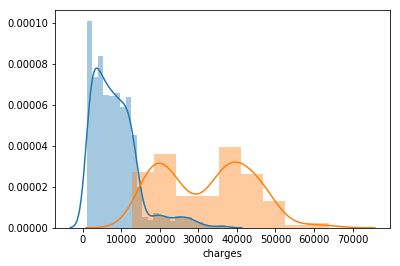

In [90]:
sns.distplot(non)
sns.distplot(smokers)

In [99]:
data1 = smokers
data2 = non
stat, p = ttest_ind(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=46.665, p=0.000
Probably different distributions
